In [1]:
!pip install tensorflow==2.0.0b1

     |████████████████████████████████| 87.9MB 117kB/s 
     |████████████████████████████████| 3.1MB 28.4MB/s 
     |████████████████████████████████| 501kB 43.1MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [4]:
import tensorflow as tf
print("Check TensorFlow Version: ", tf.__version__)

Check TensorFlow Version:  2.0.0-beta1


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [7]:
!ls '/content/gdrive/My Drive/Colab Notebooks/Time_Series/Time_SeriesW4/'

LSTM_Conv1D_Week4.ipynb       min_temp_Melbourne.csv  Sunspot_W4.ipynb
LSTM_schematic1_formulas.png  Min_Temp_Melbourne.png  time_series_LSTM.png
LSTM_schematic.jpeg	      Sunspots.csv	      Week4_Quiz_RNN.ipynb


In [0]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

--2019-12-16 05:30:20--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.01s   

2019-12-16 05:30:20 (4.36 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



In [0]:
# import csv
# time_step = []
# temps = []

# with open('/tmp/daily-min-temperatures.csv') as csvfile:
# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc

# series = np.array(temps)
# time = np.array(time_step)
# plt.figure(figsize=(10, 6))
# plot_series(time, series)

In [8]:
import pandas as pd
min_temp_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Time_Series/Time_SeriesW4/min_temp_Melbourne.csv', sep=',')

print ("dataframe shape: ", min_temp_df.shape)
min_temp_df.head(3)

dataframe shape:  (3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


Average Minimum Temperature:  11.177753424657539


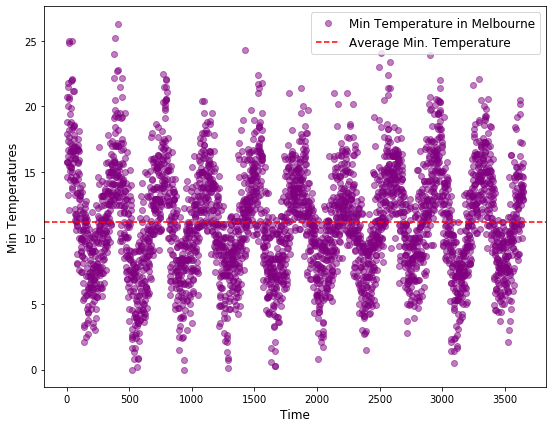

In [9]:
temperature = min_temp_df[["Temp"]]
date_time = range(len(temperature))

avg_temp = min_temp_df["Temp"].mean()
print ("Average Minimum Temperature: ", avg_temp)


fig = plt.figure(figsize=(9, 7))
plt.xlabel("Time", fontsize=12)
plt.ylabel("Min Temperatures", fontsize=12)
plt.plot(date_time, temperature, linestyle='None', marker='o', color='purple', alpha=0.5, label='Min Temperature in Melbourne')
plt.axhline(y=avg_temp, linestyle='--', color='red', label='Average Min. Temperature')
plt.legend(fontsize=12)
plt.show()

possible umber of bins:  28


<Figure size 720x576 with 0 Axes>

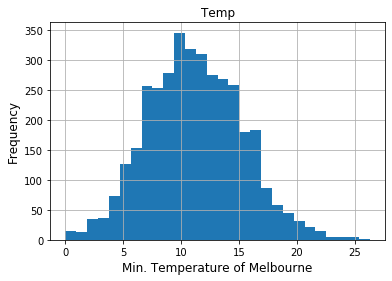

In [27]:
## Plot the Distribution of Temperature
import seaborn as sns
import math
# Choose number of bins Using Sturge's Rule
bins = 1 + (3.3 * math.log(min_temp_df.shape[0]))
print ("possible umber of bins: ", int(bins))

fig = plt.figure(figsize=(10, 8))
min_temp_df.hist(column='Temp', bins=int(bins))
plt.xlabel("Min. Temperature of Melbourne", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

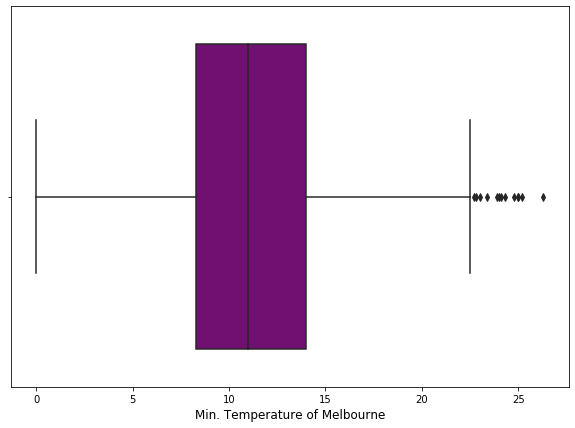

In [31]:
fig=plt.figure(figsize=(10, 7))
sns.boxplot(x=min_temp_df['Temp'], color='purple')
plt.xlabel("Min. Temperature of Melbourne", fontsize=12)
plt.show ()

Text(0.5, 0, 'Min. Temp. of Melbourne')

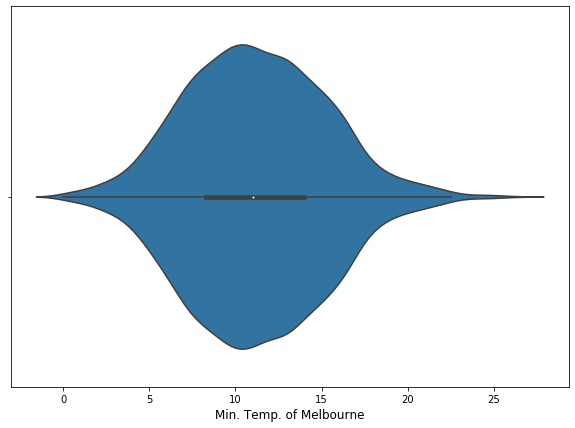

In [32]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=min_temp_df['Temp'])
plt.xlabel("Min. Temp. of Melbourne", fontsize=12)

In [0]:
temperature_array = temperature.to_numpy()

In [0]:
split_time = 2800
time_train = date_time[:split_time]# YOUR CODE HERE
x_train = temperature_array[:split_time]# YOUR CODE HERE
time_valid = date_time[split_time:]# YOUR CODE HERE
x_valid = temperature_array[split_time:]# YOUR CODE HERE

window_size = 64
batch_size = 256
shuffle_buffer_size = 1000


In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # YOUR CODE HERE
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset


In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [16]:
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print("Train Set: ", train_set)
print("X train Shape: ", x_train.shape)


Train Set:  <PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>
X train Shape:  (2800, 1)


In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=[None, 1]), 
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), 
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, )), 
                                    tf.keras.layers.Dense(20), 
                                    tf.keras.layers.Dense(15), 
                                    tf.keras.layers.Dense(1), 
                                    tf.keras.layers.Lambda(lambda x: x*30)])



model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          128       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 20)                2580      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0

In [18]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.RMSprop(lr=1e-8, rho=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=110, callbacks=[lr_schedule])

Epoch 1/110
11/11 [==============================] - 15s 1s/step - loss: 17.3911 - mae: 17.8873
Epoch 2/110
11/11 [==============================] - 10s 876ms/step - loss: 17.3857 - mae: 17.8823
Epoch 3/110
11/11 [==============================] - 10s 876ms/step - loss: 17.3810 - mae: 17.8775
Epoch 4/110
11/11 [==============================] - 10s 874ms/step - loss: 17.3760 - mae: 17.8726
Epoch 5/110
11/11 [==============================] - 10s 884ms/step - loss: 17.3707 - mae: 17.8673
Epoch 6/110
11/11 [==============================] - 10s 886ms/step - loss: 17.3650 - mae: 17.8616
Epoch 7/110
11/11 [==============================] - 10s 888ms/step - loss: 17.3585 - mae: 17.8551
Epoch 8/110
11/11 [==============================] - 10s 883ms/step - loss: 17.3509 - mae: 17.8475
Epoch 9/110
11/11 [==============================] - 10s 877ms/step - loss: 17.3426 - mae: 17.8392
Epoch 10/110
11/11 [==============================] - 10s 873ms/step - loss: 17.3331 - mae: 17.8297
Epoch 11/110

In [19]:
print ("minimum value of loss: ", min(history.history['loss']))
min_indcs = [i for i, x in enumerate(history.history['loss']) if x==min(history.history['loss'])]
final_lr = history.history['lr'][min_indcs[0]]
print ("corresponding index: ", min_indcs)
print ("corresponding learning rate: ", history.history['lr'][min_indcs[0]])

minimum value of loss:  1.7266484199211611
corresponding index:  [71]
corresponding learning rate:  3.548134e-05


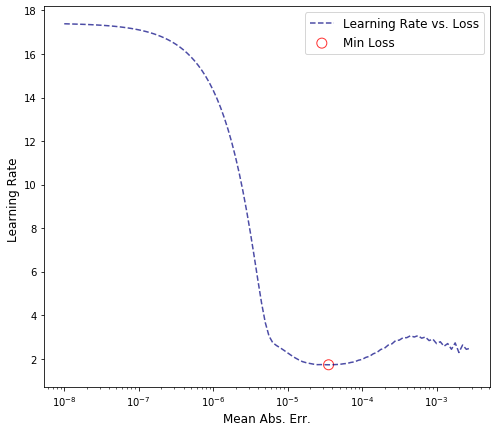

In [33]:
learning_rate = history.history["lr"]
Loss_learning_rate = history.history["loss"]

fig = plt.figure(figsize=(8, 7))
plt.semilogx(learning_rate, Loss_learning_rate, linestyle='--', color='navy', alpha=0.7, label='Learning Rate vs. Loss')
plt.scatter(final_lr, min(history.history['loss']), marker='o', s= 100, facecolor='', edgecolor = 'red', alpha=0.8, label='Min Loss') #facecolors, edgecolors
plt.xlabel("Mean Abs. Err.", fontsize=12)
plt.ylabel("Learning Rate ", fontsize=12)
plt.legend(fontsize=12)
plt.show()
# plt.axis([1e-8, 1e-4, 0, 60])

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


In [35]:
train_set1 = windowed_dataset(x_train, window_size=64, batch_size=256, shuffle_buffer=shuffle_buffer_size)
model1 = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=[None, 1]), 
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), 
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,)), 
                                    tf.keras.layers.Dense(20), 
                                    tf.keras.layers.Dense(10), 
                                    tf.keras.layers.Dense(1), 
                                    tf.keras.layers.Lambda(lambda x: x*30)])


model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          128       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 20)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0

In [0]:
#### Create a callback class

class trycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<2.00):
            print ("\n Mean Abs. Err has gone down below 2 !!Stopping!!")
            self.model.stop_training = True

callbacks = trycallback()

In [37]:

optimizer1 = tf.keras.optimizers.RMSprop(lr=final_lr, rho=0.9)

model1.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer1,
              metrics=["mae"])

history1 = model1.fit(train_set1, epochs=100, callbacks=[callbacks])
                                    
# EXPECTED OUTPUT SHOULD SEE AN MAE OF <2 WITHIN ABOUT 30 EPOCHS

Epoch 1/100
11/11 [==============================] - 13s 1s/step - loss: 3.7564 - mae: 4.2829
Epoch 2/100
11/11 [==============================] - 8s 707ms/step - loss: 1.8436 - mae: 2.2958
Epoch 3/100
11/11 [==============================] - 8s 704ms/step - loss: 1.7951 - mae: 2.2451
Epoch 4/100
11/11 [==============================] - 8s 703ms/step - loss: 1.7590 - mae: 2.2060
Epoch 5/100
11/11 [==============================] - 8s 706ms/step - loss: 1.7293 - mae: 2.1760
Epoch 6/100
11/11 [==============================] - 8s 702ms/step - loss: 1.7073 - mae: 2.1526
Epoch 7/100
11/11 [==============================] - 8s 702ms/step - loss: 1.6898 - mae: 2.1346
Epoch 8/100
11/11 [==============================] - 8s 695ms/step - loss: 1.6761 - mae: 2.1203
Epoch 9/100
11/11 [==============================] - 8s 703ms/step - loss: 1.6641 - mae: 2.1083
Epoch 10/100
11/11 [==============================] - 8s 705ms/step - loss: 1.6534 - mae: 2.0973
Epoch 11/100
11/11 [=====================

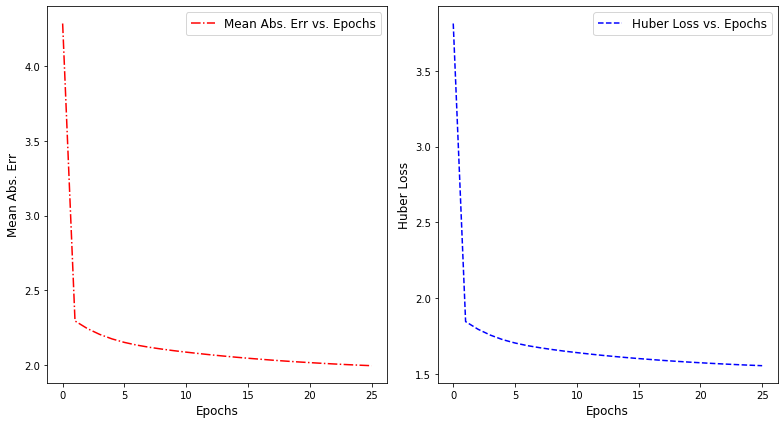

In [38]:
mae_final = history1.history['mae']
loss_final = history1.history['loss']
epochs = range(len(mae_final))

fig = plt.figure(figsize=(11,6))

plt.subplot(1, 2, 1)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Abs. Err', fontsize=12)
plt.plot(epochs, mae_final, linestyle='-.', color='red', label='Mean Abs. Err vs. Epochs')
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Huber Loss', fontsize=12)
plt.plot(epochs, loss_final, linestyle='--', color='blue', label='Huber Loss vs. Epochs')
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [0]:
# rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
# rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [0]:
tot_dataset = windowed_dataset(temperature_array, window_size=64, batch_size=256, shuffle_buffer=shuffle_buffer_size)


In [40]:
forecasts = []
for time in range(len(temperature_array) - window_size):
  pred = model1.predict(temperature_array[time: time+window_size][np.newaxis])
  forecasts.append(pred)

print ("length of forecast list: ",len(forecasts))


length of forecast list:  3586


In [41]:
result_forecast = forecasts[split_time - window_size: ]
result_forecast = np.array(result_forecast)[:, 0]
print ("shape of resulting forecast array: ", result_forecast.shape)

shape of resulting forecast array:  (850, 1)


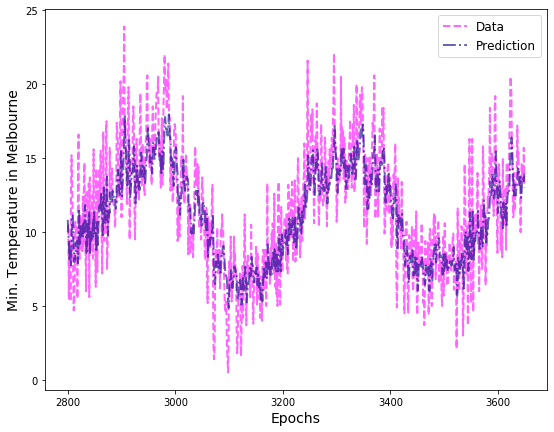

In [42]:

fig = plt.figure(figsize=(9, 7))
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Min. Temperature in Melbourne", fontsize=14)
plt.plot(time_valid, x_valid, linestyle='--', linewidth=2, color='magenta', alpha=0.6, label='Data')
plt.plot(time_valid, result_forecast, linestyle='-.', linewidth=2, color='navy', alpha=0.6, label='Prediction')
plt.legend(fontsize=12)
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Time_Series/Time_SeriesW4/Min_Temp_Melbourne.png', dpi=300)
plt.show()

In [0]:
tf.keras.metrics.mean_absolute_error(np.squeeze(x_valid), np.squeeze(result_forecast)).numpy()

# EXPECTED OUTPUT MAE < 2 -- I GOT 1.789626

1.8324342

In [0]:
print ("Expected Forecast: ") 
for k in range(len(result_forecast)):
  print (np.squeeze(result_forecast)[k])

Expected Forecast: 
12.053017
11.792267
12.366763
13.306524
12.211916
11.155427
11.614148
12.409719
12.045596
10.949913
12.097877
13.219431
14.438123
16.534943
14.204789
12.2066765
11.286815
12.751199
12.760183
11.745859
11.839579
12.055125
11.408148
12.412187
12.895279
12.481423
11.952255
10.653496
10.537785
11.745921
11.439651
11.143943
11.271439
12.106954
12.89926
13.33804
12.9946375
13.18892
13.981925
15.064404
16.267914
14.830014
13.278886
12.56121
13.047306
13.2564945
12.589068
12.313357
12.2529
12.480198
12.792209
13.914466
13.815446
13.616408
13.453215
14.420219
14.21193
13.577705
13.136246
13.622848
13.7692995
14.331111
15.278212
16.139547
15.652771
15.750403
16.284101
16.61623
17.937727
18.237026
17.993233
16.635786
15.321039
15.340911
15.235049
14.900818
14.27898
14.534212
15.036135
13.881355
13.141464
13.413728
14.294337
15.38398
16.878517
18.011415
15.366403
14.232317
14.769585
14.6488085
14.802379
14.560317
14.256191
12.372601
12.842467
14.149823
13.275912
13.680148
14.68